In [20]:
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import math
#pip install Jinja2

First of all we have pass the data from a SQLitle database to a panda dataframe, to make it easier to work with.

In [21]:
# Establish a connection to the SQLite database
conn = sqlite3.connect("/root/home/LALIGA/LALIGA/laliga.sqlite")
#Read into pandas dataframe 
df = pd.read_sql_query("SELECT * FROM Matches", conn)
print(df.columns)
display(df)
print(len(df))


Index(['season', 'division', 'matchday', 'date', 'time', 'home_team',
       'away_team', 'score'],
      dtype='object')


,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None


48780


1. When we have all the data, we print the columns to analize the diferent variables in the data. Then we can start with the workload.
Exercise 1: Is it true that the home team is more likely to win? Make a pie chart showing the result distribution (whether home team wins, visitor team wins, or 
there’s a tie) of all matches in the data. Write in the plot the percentage o 
each categor.


In [22]:
def process_and_filter_data(input_df):    
    # Create a copy of the df, and erase the Nones
    filtered_score_df = input_df[input_df['score'].notna()].copy()
    
    # Split the score to make it easier to read
    split_scores = filtered_score_df['score'].str.split(':', expand=True).astype(int)
    
    # Assign the split scores to new columns
    filtered_score_df['home_score'] = split_scores[0]
    filtered_score_df['away_score'] = split_scores[1]
    return filtered_score_df

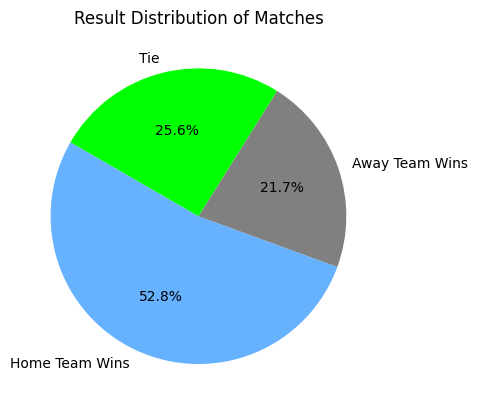

In [23]:
df_1=process_and_filter_data(df)  

home_wins = len(df_1[df_1['home_score'] > df_1['away_score']]) #The home team wins
away_wins = len(df_1[df_1['away_score'] > df_1['home_score']]) #The away team wins
ties = len(df_1[df_1['home_score'] == df_1['away_score']]) #It is a tie

# With all the data, we create a pie chart:
colors = ['#66B2FF', '#808080', '#00FF00'] #Change the colors please, I don't like any of them.
labels = 'Home Team Wins', 'Away Team Wins', 'Tie'
Results = [home_wins, away_wins, ties]

plt.pie(Results, labels=labels, autopct='%1.1f%%', startangle=150, colors=colors) 

plt.title("Result Distribution of Matches")
plt.show()


2. What are the top ten scoring teams of all time? What are the ten teams 
that concede the most? Make two bar plot charts showing each of them 
Consider only matches played in 1st divisio .
What have been the biggest wins? Of course, when we say biggest we m an
those with the highest goal difference. Show the top ten of them in a table.

In [24]:
#Mover esto si no és aquí al Top ten wins
first_division_matches = df[df['division'] == 1]


Top ten scoring teams

,Team,Total Scored Goals
0,Barcelona,6267
1,Real Madrid,6249
2,Athletic,4802
3,Valencia,4615
4,Atlético Madrid,4184
5,Sevilla FC,3903
6,Espanyol,3720
7,Real Sociedad,3200
8,Real Zaragoza,2683
9,Celta de Vigo,2483


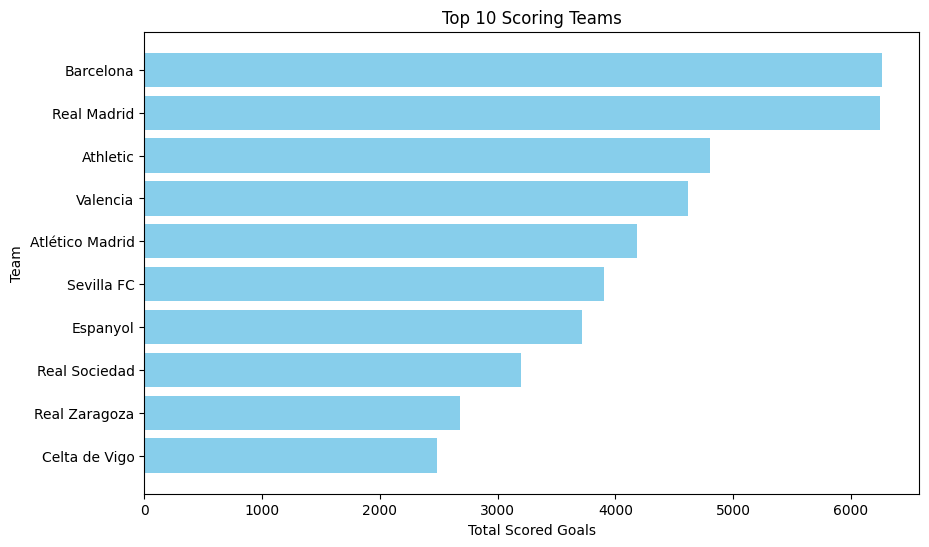

In [25]:
def sort_scoring_teams(filtered_score_df):
    # Group by home teams and calculate the total goals scored
    home_team_goals = filtered_score_df.groupby('home_team')['home_score'].sum()
    
    # Group by away teams and calculate the total goals scored
    away_team_goals = filtered_score_df.groupby('away_team')['away_score'].sum()
    
    # Calculate the total goals scored by each team
    total_goals = home_team_goals + away_team_goals
    
    # Sort the total goals scored in descending order
    sorted_total_goals = total_goals.sort_values(ascending=False)
    
    #Make a data frame to a prettier presentation
    team_goals_df = sorted_total_goals.reset_index()
    team_goals_df.columns = ["Team", "Total Scored Goals"]
    return(team_goals_df)

# Print the top 10 teams with the most scored goals
top10_scoring= sort_scoring_teams(process_and_filter_data(first_division_matches)).head(10)

display(top10_scoring)

#The plot
plt.figure(figsize=(10, 6))
plt.barh(top10_scoring['Team'], top10_scoring['Total Scored Goals'], color='skyblue')
plt.xlabel('Total Scored Goals')
plt.ylabel('Team')
plt.title('Top 10 Scoring Teams')
plt.gca().invert_yaxis()
plt.show()

Top ten coneding teams

,Team,Total Conceaded Goals
0,Espanyol,4034
1,Athletic,3875
2,Valencia,3649
3,Sevilla FC,3546
4,Real Madrid,3287
5,Barcelona,3259
6,Real Sociedad,3126
7,Atlético Madrid,2894
8,Celta de Vigo,2856
9,Real Zaragoza,2847


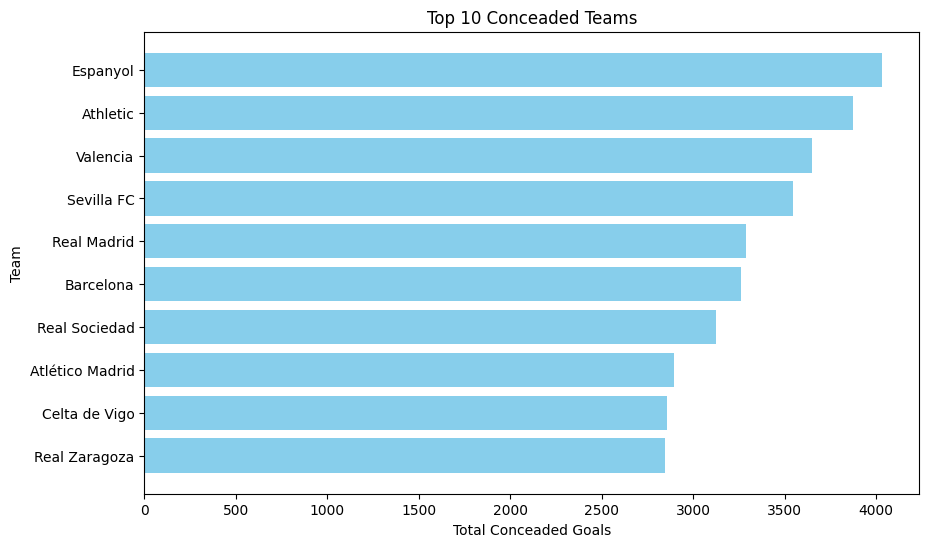

In [26]:
def sort_conceded_teams(filtered_score_df):
    # Group by home teams and calculate the total goals conceded
    home_team_conceaded_goals = filtered_score_df.groupby('away_team')['home_score'].sum()
    
    # Group by away teams and calculate the total goals conceded
    away_team_conceaded_goals = filtered_score_df.groupby('home_team')['away_score'].sum()
    
    # Calculate the total goals conceded by each team
    total_conceaded_goals = home_team_conceaded_goals + away_team_conceaded_goals
    
    # Sort the total goals scored in descending order
    sorted_total_conceaded_goals = total_conceaded_goals.sort_values(ascending=False)
    
    #Make a data drame to a prettier presentation
    team_conceaded_goals_df = sorted_total_conceaded_goals.reset_index()
    team_conceaded_goals_df.columns = ["Team", "Total Conceaded Goals"]
    return team_conceaded_goals_df

# Print the top 10 teams with the most conceaded goals
top10_conceaded= sort_conceded_teams(process_and_filter_data(first_division_matches)).head(10)

display(top10_conceaded)

#The plot
plt.figure(figsize=(10, 6))
plt.barh(top10_conceaded['Team'], top10_conceaded['Total Conceaded Goals'], color='skyblue')
plt.xlabel('Total Conceaded Goals')
plt.ylabel('Team')
plt.title('Top 10 Conceaded Teams')
plt.gca().invert_yaxis() 
plt.show()

Top ten biggest wins.

In [27]:
def sorted_wins_f(filtered_score_df):
    filtered_score_df['Difference'] = abs(filtered_score_df['home_score'] - filtered_score_df['away_score'])
    sorted_wins = filtered_score_df.sort_values(by='Difference', ascending=False)
    return sorted_wins
display(sorted_wins_f(process_and_filter_data(first_division_matches)).head(10))

,season,division,matchday,date,time,home_team,away_team,score,home_score,away_score,Difference
225,1930-1931,1,10,2/8/31,None,Athletic,Barcelona,12:1,12,1,11
936,1940-1941,1,1,9/29/40,None,Sevilla FC,Barcelona,11:1,11,1,10
2787,1950-1951,1,11,11/19/50,None,Athletic,Lérida,10:0,10,0,10
1168,1941-1942,1,15,1/11/42,None,Athletic,Celta de Vigo,10:0,10,0,10
1071,1941-1942,1,1,9/28/41,None,Sevilla FC,Real Oviedo,10:0,10,0,10
3629,1953-1954,1,26,3/28/54,None,Barcelona,Real Oviedo,9:0,9,0,9
10024,1978-1979,1,16,1/14/79,None,Barcelona,Rayo Vallecano,9:0,9,0,9
408,1932-1933,1,10,1/29/33,None,Racing,Alavés,9:0,9,0,9
5027,1959-1960,1,21,2/7/60,None,Real Madrid,Elche CF,11:2,11,2,9
3911,1955-1956,1,1,9/11/55,None,Atlético Madrid,Hércules CF,9:0,9,0,9


3. There has been a lot of discussion about how LaLiga’s television rights have
changed game schedules in the last years. Make a bar plot chart showing
the number of matches played each weekday, and make also a histogram
of match time. Compare this two graphics between seasons 2000-2001 and
2020-2021.


We will use the comand day_name to make it easier to convert the numeric dates into weekdays

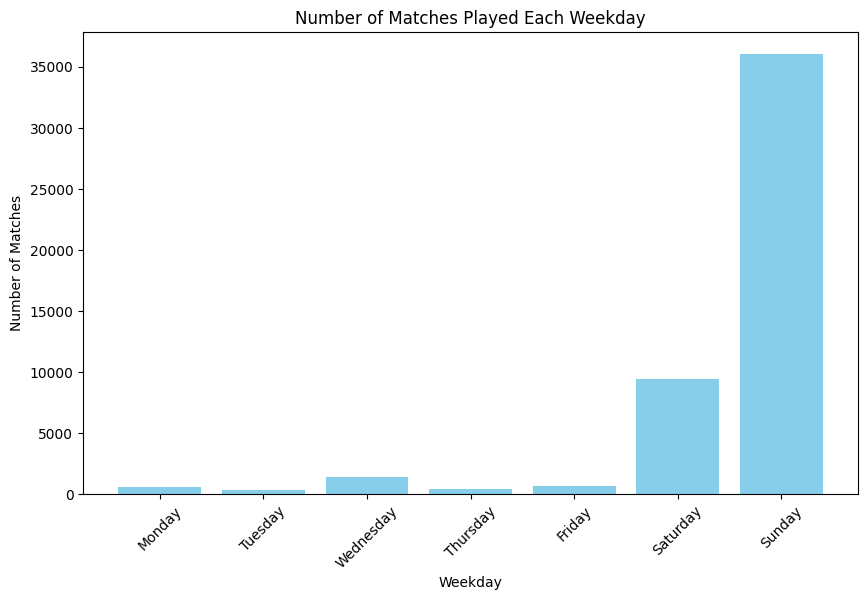

In [28]:
def correct_date(df):
        # Split the score to make it easier to read
        split_dates = df['date'].str.split('/', expand=True).astype(int)
    
        df_copy = df.copy()
    
        # Assign the split scores to new columns
        df_copy['day'] = split_dates[1]
        df_copy['month'] = split_dates[0]
        df_copy['year'] = split_dates[2]
    
        # Convert years to 4 digits format
        def correct_year(year):
            if year > 25:
                return year + 1900
            else:
                return year + 2000
    
        df_copy['year'] = df_copy['year'].apply(correct_year)
    
        # Transform date into the correct format for the command
        df_copy['date1'] = pd.to_datetime(df_copy[['year', 'month', 'day']])
        return(df_copy)

def plot_weekday_matches(df):
    correct_date(df)
    df_date=correct_date(df)

    # Apply the command to extract the day of the week
    df_date['day_of_week'] = df_date['date1'].dt.day_name()

    # Sort the data and count it
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df_date['day_of_week'] = pd.Categorical(df_date['day_of_week'], categories=days_order, ordered=True)
    weekday_counts = df_date['day_of_week'].value_counts()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(weekday_counts[days_order].index, weekday_counts[days_order].values, color='skyblue')
    plt.xlabel('Weekday')
    plt.ylabel('Number of Matches')
    plt.title('Number of Matches Played Each Weekday')
    plt.xticks(days_order, rotation=45)
    plt.show()
plot_weekday_matches(df)

Now, to search for the diferent times

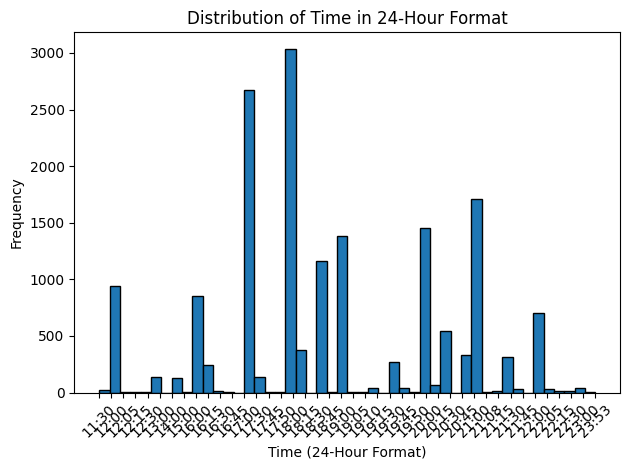

In [29]:
def plot_time_distribution(data):
    # Filter the data 
    filtered_time_df = data[data['time'].notna()].copy()

    # Convert the time to 24-hour format
    def convert_to_24h(time_str):
        parts = time_str.split()
        time_parts = parts[0].split(':')
        hour = int(time_parts[0])
        minute = int(time_parts[1])

        if parts[1].upper() == 'PM' and hour != 12:
            hour += 12

        return f'{hour:02d}:{minute:02d}'

    filtered_time_df['time'] = filtered_time_df['time'].apply(convert_to_24h)

    #Finally we sort the data to ensure a correct histogram
    filtered_time_df.sort_values(by='time', inplace=True)

    # The plot
    plt.hist(filtered_time_df['time'], bins=48, edgecolor='black')
    plt.xlabel('Time (24-Hour Format)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Time in 24-Hour Format')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_time_distribution(df)

Comparision of seasons (We could fix the x axis limits in Time for better comparision? what do u think)

Season2000-2001


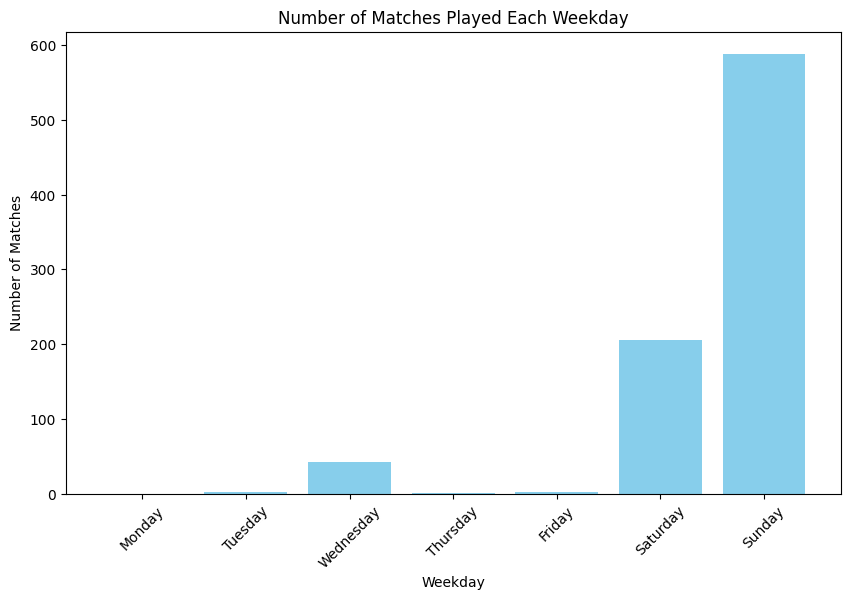

Season2020-2021


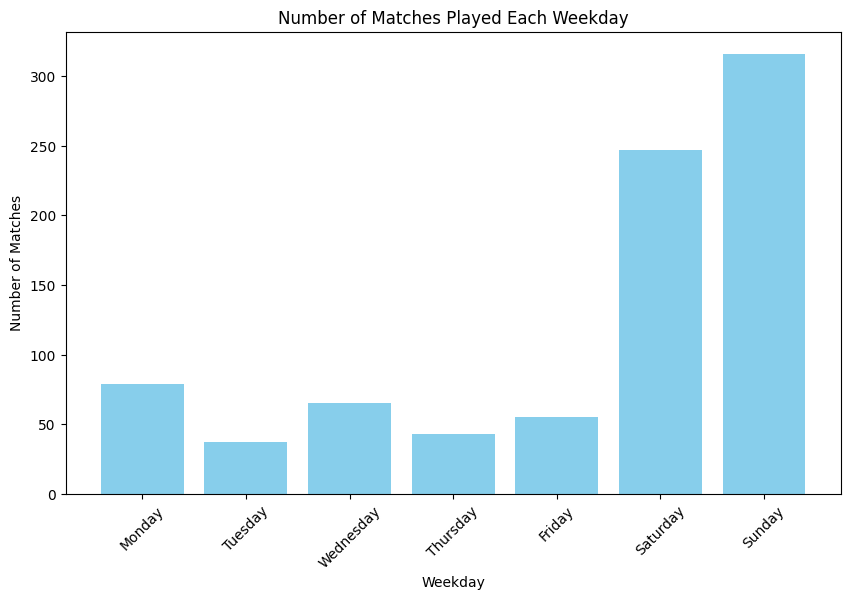

Season2000-2001


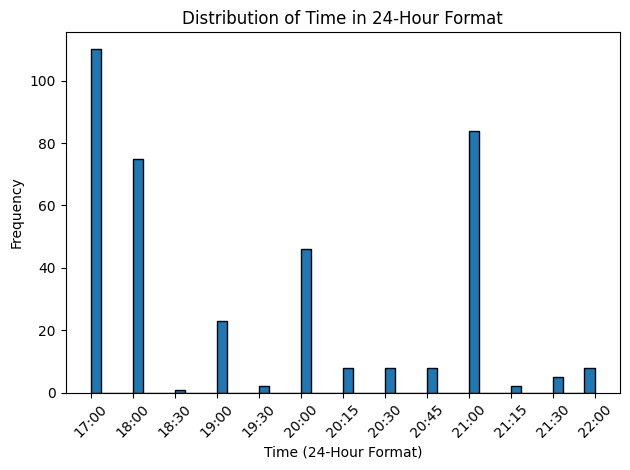

Season2020-2021


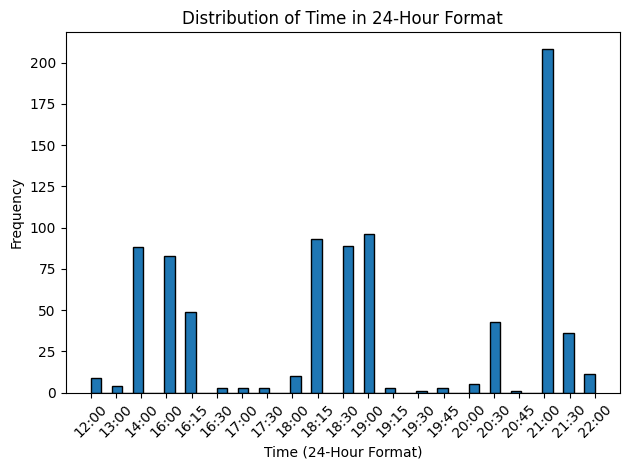

In [30]:
df2000= df[df['season'] == '2000-2001']
df2020= df[df['season'] == '2020-2021']
print('Season2000-2001')
plot_weekday_matches(df2000)
print('Season2020-2021')
plot_weekday_matches(df2020)
print('Season2000-2001')
plot_time_distribution(df2000)
print('Season2020-2021')
plot_time_distribution(df2020)

4. Build a cross results table for season 2020-2021 (1st division). Figure 1 is an 
example taken from Wikipedia. Try to make it the most similar to this one 
painting the background of each cell according to result (green in case loc l
team wins and red in case visitor team wins). Also, could you model  he
intensity of this background color with the goal difference from the match?

In [31]:
def plot_cross_results_table(season,division):
    df_4 = df[(df['division'] == division) & (df['season'] == season)]
    df_4 = process_and_filter_data(df_4)
    df_4['Goal Difference'] = df_4['home_score']-df_4['away_score']
    
    def intens(value):
        return (abs(max(df_4['Goal Difference']-value)/max(df_4['Goal Difference'])*0.7+0.3))

    def format_color(value):
        def intensifier(original_color, intensity):     
        
            r = int(original_color[1:3], 16)
            g = int(original_color[3:5], 16)
            b = int(original_color[5:7], 16)
        
            new_r = int(r * intensity)
            new_g = int(g * intensity)
            new_b = int(b * intensity)
        
            new_color = f"#{new_r:02X}{new_g:02X}{new_b:02X}"
            return new_color
        
        original_style ='border: 1px solid black; text-align: center; background-color: #FFCCCC'
        if value != '-':
            elements = value.split("-")
            diff = int(elements[0]) - int(elements[1])
            new_background_color='#FFFFCC'
        
            if diff > 0:
                
                new_background_color=intensifier('#C8FFB0',intens(diff))
                updated_style = original_style.replace('#FFCCCC', new_background_color) 
                return  updated_style
            if diff < 0:
                diff=abs(diff)
                new_background_color=intensifier('#FF6666',intens(diff))
                updated_style = original_style.replace('#FFCCCC', new_background_color) 
                return  updated_style
            else:
                return 'border: 1px solid black; text-align: center; background-color: #FFFFCC'  # Yellow
        else:
            return 'border: 1px solid black; text-align: center; background-color: white'
        
    
    df_4['score'] = df_4['score'].str.replace(':', '-')
    cross_tab = pd.crosstab(df_4['home_team'], df_4['away_team'], values=df_4['score'], aggfunc='first').fillna('-').style.applymap(format_color)

    return cross_tab
    


plt.show()
plot_cross_results_table('2020-2021',1)

/tmp/ipykernel_9658/1341329103.py:46: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  cross_tab = pd.crosstab(df_4['home_team'], df_4['away_team'], values=df_4['score'], aggfunc='first').fillna('-').style.applymap(format_color)


away_team,Alavés,Athletic,Atlético Madrid,Barcelona,CA Osasuna,Celta de Vigo,Cádiz CF,Elche CF,Getafe,Granada CF,Levante,Real Betis,Real Madrid,Real Sociedad,Real Valladolid,SD Eibar,SD Huesca,Sevilla FC,Valencia,Villarreal
home_team,,,,,,,,,,,,,,,,,,,,
Alavés,-,1-0,1-2,1-1,0-1,1-3,1-1,0-2,0-0,4-2,2-2,0-1,1-4,0-0,1-0,2-1,1-0,1-2,2-2,2-1
Athletic,0-0,-,2-1,2-3,2-2,0-2,0-1,1-0,5-1,2-1,2-0,4-0,0-1,0-1,2-2,1-1,2-0,2-1,1-1,1-1
Atlético Madrid,1-0,2-1,-,1-0,2-1,2-2,4-0,3-1,1-0,6-1,0-2,2-0,1-1,2-1,2-0,5-0,2-0,2-0,3-1,0-0
Barcelona,5-1,2-1,0-0,-,4-0,1-2,1-1,3-0,5-2,1-2,1-0,5-2,1-3,2-1,1-0,1-1,4-1,1-1,2-2,4-0
CA Osasuna,1-1,1-0,1-3,0-2,-,2-0,3-2,2-0,0-0,3-1,1-3,0-2,0-0,0-1,0-0,2-1,1-1,0-2,3-1,1-3
Celta de Vigo,2-0,0-0,0-2,0-3,2-1,-,4-0,3-1,1-0,3-1,2-0,2-3,1-3,1-4,1-1,1-1,2-1,3-4,2-1,0-4
Cádiz CF,3-1,0-4,2-4,2-1,0-2,0-0,-,1-3,0-2,1-1,2-2,0-1,0-3,0-1,0-0,1-0,2-1,1-3,2-1,0-0
Elche CF,0-2,2-0,0-1,0-2,2-2,1-1,1-1,-,1-3,0-1,1-0,1-1,1-1,0-3,1-1,1-0,0-0,2-1,2-1,2-2
Getafe,0-0,1-1,0-0,1-0,1-0,1-1,0-1,1-1,-,0-1,2-1,3-0,0-0,0-1,0-1,0-1,1-0,0-1,3-0,1-3


5. As you surely know, there has always been a historical rivalry between Barcelona and Real Madrid. But which of them has won the most games in direct confrontations? Which of them has scored the most goals in these games? Show both things in two pie charts, side by side. Remember to consider ties in the first one. Write a function that, given two team names, plots the two graphs described above. Function prototype should be like plot_direct_confrontations_- stats(team1, team2) and return the plot object. Use it with some other classical rivals like Betis and Sevilla.


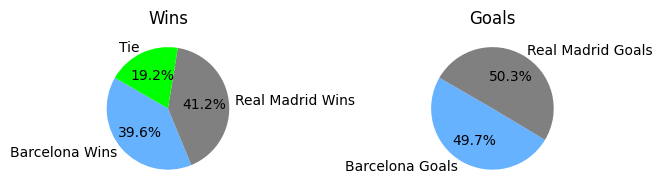

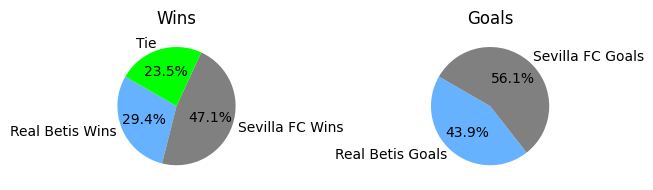

In [32]:
df_filtered = process_and_filter_data(df)
def plot_direct_confrontations_stats(team1, team2):

    team1_wins = len(df_filtered[(df_filtered['home_team'] == team1) & (df_filtered['away_team'] == team2) & (df_filtered['home_score'] > df_filtered['away_score'])])+len(df_filtered[(df_filtered['home_team'] == team2) & (df_filtered['away_team'] == team1) & (df_filtered['home_score'] < df_filtered['away_score'])])
    team2_wins = len(df_filtered[(df_filtered['home_team'] == team2) & (df_filtered['away_team'] == team1) & (df_filtered['home_score'] > df_filtered['away_score'])])+len(df_filtered[(df_filtered['home_team'] == team1) & (df_filtered['away_team'] == team2) & (df_filtered['home_score'] < df_filtered['away_score'])])
    ties = len(df_filtered[(df_filtered['home_team'] == team1) & (df_filtered['away_team'] == team2) & (df_filtered['home_score'] == df_filtered['away_score'])])+len(df_filtered[(df_filtered['home_team'] == team2) & (df_filtered['away_team'] == team1) & (df_filtered['home_score'] == df_filtered['away_score'])])
    team1_goals = sum(df_filtered[(df_filtered['home_team'] == team1) & (df_filtered['away_team'] == team2)]['home_score'])+sum(df_filtered[(df_filtered['home_team'] == team2) & (df_filtered['away_team'] == team1)]['away_score'])
    team2_goals = sum(df_filtered[(df_filtered['home_team'] == team1) & (df_filtered['away_team'] == team2)]['away_score'])+sum(df_filtered[(df_filtered['home_team'] == team2) & (df_filtered['away_team'] == team1)]['home_score'])
 
    # With all the data, we create the pies charts:
    plt.subplot(121)
    colors = ['#66B2FF', '#808080', '#00FF00'] #Change the colors please, I don't like any of them.
    labels_wins = f"{team1} Wins", f"{team2} Wins", 'Tie'
    Results_wins = [team1_wins, team2_wins, ties]
    plt.pie(Results_wins, labels=labels_wins, autopct='%1.1f%%', startangle=150, colors=colors) 
    plt.title("Wins")

    
    plt.subplot(122)
    colors = ['#66B2FF', '#808080', '#00FF00'] #Change the colors please, I don't like any of them.
    labels_goals = f"{team1} Goals", f"{team2} Goals"
    Results_goals = [team1_goals, team2_goals]
    plt.pie(Results_goals, labels=labels_goals, autopct='%1.1f%%', startangle=150, colors=colors) 
    plt.title("Goals")
    plt.tight_layout()

    # Show the plot
    plt.show()  



plot_direct_confrontations_stats('Barcelona','Real Madrid')

plot_direct_confrontations_stats('Real Betis','Sevilla FC')


6. Between 1979 and 1980, Real Sociedad managed to chain a total of 38 games 
without losing. That was, by far, the longest undefeated streak in theirhiiotory. Which teams have had the longest undefeated streaks? Show th 
longest undefeated streaks in a horizontal bar plot, indicating in each b r
the team name and the dates it held that streak, for instance, Real Socie ad
22/04/1979 - 04/05/1980.

In [33]:
df_filtered = process_and_filter_data(df)
def separate_wins_loses_ties(df_filtered):
    df_filtered['Win_local'] = np.where(df_filtered['home_score'] > df_filtered['away_score'], 1, 0)
    df_filtered['Win_away'] = np.where(df_filtered['home_score'] < df_filtered['away_score'], 1, 0)
    df_filtered['Ties'] = np.where(df_filtered['home_score'] == df_filtered['away_score'], 1, 0)
    # Combine home and away matches to identify all matches for each team
    df_teams = pd.concat([df_filtered.rename(columns={'home_team': 'team', 'Win_local': 'Win','Win_away':'Lose', 'home_score' : 'GF', 'away_score': 'GA',}),
                            df_filtered.rename(columns={'away_team': 'team', 'Win_away': 'Win','Win_local':'Lose', 'home_score' : 'GA', 'away_score': 'GF'})], ignore_index=True)  
    return(df_teams)

df_teams = separate_wins_loses_ties(df_filtered) 
df_teams=correct_date(df_teams)
# Sort matches by date
df_teams = df_teams.sort_values(by=['team', 'date1'])



df_teams['team_changed'] = df_teams['team'] != df_teams['team'].shift(1)
df_teams['streak_start'] = (df_teams['Lose'] == 0) & (df_teams['Lose'].shift(1) != 1)| df_teams['team_changed']

df_teams['streak_decrement'] = (df_teams['streak_start'] == False).astype(int)

df_teams['streak'] = df_teams['streak_decrement'].cumsum().sub(1)
display(df_teams)
streak_counts = df_teams['streak'].value_counts()
max_values=streak_counts.head(10)
print(max_values)
Firsts=[]
Lasts=[]
for i in range (len(max_values)):
    first_index=(df_teams[df_teams['streak'] == max_values.index[i]]['streak'].idxmin())
    last_index=(df_teams[df_teams['streak'] == max_values.index[i]][::-1]['streak'].idxmin())
    Firsts.append(first_index)
    Lasts.append(last_index)
    df_teams.loc[first_index,'Rows']=max_values.iloc[i]
    df_teams.loc[last_index,'Rows']=max_values.iloc[i]


selected_rows = df_teams.loc[Firsts+Lasts]
df_clean=selected_rows[['team','date1','Rows']]
df_clean=df_clean.sort_values(by=['team', 'date1']).reset_index().reset_index()
df_clean['Marker'] = df_clean['level_0'].apply(lambda x: math.trunc(x / 2))
df_clean = df_clean.groupby(['team', 'Marker','Rows'])['date1'].agg(lambda x: 'a'.join(x.dt.strftime('%d-%m-%Y'))).reset_index()
df_clean = df_clean.sort_values(by='Rows', ascending=False).reset_index()
df_clean = df_clean.drop(columns=['Marker','index'])
df_clean['date1'] = df_clean['date1'].str.replace('-', '/').str.replace('a', '-')
df_clean = df_clean[['Rows','team','date1']]


display(df_clean)

,season,division,matchday,date,time,team,away_team,score,GF,GA,...,Ties,home_team,day,month,year,date1,team_changed,streak_start,streak_decrement,streak
58196,1979-1980,1,1,9/8/79,None,AD Almería,NaN,5:2,2,5,...,0,Espanyol,8,9,1979,1979-09-08,True,True,0,-1
10210,1979-1980,1,2,9/16/79,None,AD Almería,Real Zaragoza,1:0,1,0,...,0,NaN,16,9,1979,1979-09-16,False,False,1,0
58215,1979-1980,1,3,9/23/79,None,AD Almería,NaN,0:0,0,0,...,1,Real Betis,23,9,1979,1979-09-23,False,True,0,0
10228,1979-1980,1,4,9/30/79,None,AD Almería,Real Madrid,1:1,1,1,...,1,NaN,30,9,1979,1979-09-30,False,True,0,0
58232,1979-1980,1,5,10/14/79,None,AD Almería,NaN,2:1,1,2,...,0,UD Salamanca,14,10,1979,1979-10-14,False,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84806,1996-1997,2,34,5/11/97,None,Écija Balompié,NaN,2:1,1,2,...,0,RCD Mallorca,11,5,1997,1997-05-11,False,False,1,59342
36818,1996-1997,2,35,5/18/97,None,Écija Balompié,Alavés,1:1,1,1,...,1,NaN,18,5,1997,1997-05-18,False,False,1,59343
84829,1996-1997,2,36,5/25/97,None,Écija Balompié,NaN,0:2,2,0,...,0,Levante,25,5,1997,1997-05-25,False,True,0,59343
36838,1996-1997,2,37,6/1/97,None,Écija Balompié,SD Eibar,0:2,0,2,...,0,NaN,1,6,1997,1997-06-01,False,False,1,59344


streak
7597     43
43103    38
39642    31
7552     31
45289    29
39746    29
39648    29
39985    28
39398    27
7044     26
Name: count, dtype: int64


,Rows,team,date1
0,43.0,Barcelona,15/04/2017-09/05/2018
1,38.0,Real Sociedad,29/04/1979-04/05/1980
2,31.0,Barcelona,19/09/2010-23/04/2011
3,31.0,Real Madrid,08/05/1988-09/04/1989
4,29.0,Real Madrid,11/11/1989-02/09/1990
5,29.0,Real Madrid,28/04/1996-15/02/1997
6,29.0,Real Valladolid,07/10/2006-29/04/2007
7,28.0,Real Madrid,02/03/2016-07/01/2017
8,27.0,Real Madrid,15/09/1968-30/03/1969
9,26.0,Barcelona,07/10/1973-21/04/1974


7. Create a table with the final standings of each season (and division), that is, a table that contains all the teams ordered (in descending order) by the number of points they got during that season, and some other aggregate statistics. The table must contain the following columns: season, division,
ranking, team, GF (total goals scored), GA (total goals conceded), GD (goals difference), W (total wins), L (total loses), T (total ties), Pts points). Remember that, in football, you earn 3 points per victory, and 1 point per tie (none for loses). In case two teams have same number of points, order by GD (descending), and then by GF (also descending). Order the table so that standings of one season come before standings of previous one, and standings of 1st division come before standings of 2nd division.

In [34]:
df_filtered = process_and_filter_data(df)
#openpyxl for the excel
#If you want to see the table of the exercise, decoment the  next line
df_filtered= df_filtered[df_filtered['season'] != '2021-2022']
def separate_wins_loses_ties(df_filtered):
    df_filtered['Win_local'] = np.where(df_filtered['home_score'] > df_filtered['away_score'], 1, 0)
    df_filtered['Win_away'] = np.where(df_filtered['home_score'] < df_filtered['away_score'], 1, 0)
    df_filtered['Ties'] = np.where(df_filtered['home_score'] == df_filtered['away_score'], 1, 0)
    
    # Combine home and away matches to identify all matches for each team
    df_teams = pd.concat([df_filtered.rename(columns={'home_team': 'team', 'Win_local': 'Win','Win_away':'Lose', 'home_score' : 'GF', 'away_score': 'GA',}),
                             df_filtered.rename(columns={'away_team': 'team', 'Win_away': 'Win','Win_local':'Lose', 'home_score' : 'GA', 'away_score': 'GF'})], ignore_index=True)
    return(df_teams)

df_7 = separate_wins_loses_ties(df_filtered) [['season','division','team','GF','GA','Win','Lose','Ties']]

def Complete_table(df_7):
    Results = df_7.groupby(['season','division','team']).agg({
        'GF': 'sum',
        'GA': 'sum',
        'Win': 'sum',
        'Lose': 'sum',
        'Ties': 'sum'
    }).reset_index()
    
    
    Results['Pts']=3*Results['Win']+Results['Ties']
    Results['GD']=Results['GF']-Results['GA']
    Results =Results.sort_values(by=['season','division','Pts'], ascending=[False,True,False])
    Results['rank'] = Results.groupby(['season', 'division'])['Pts'].rank(ascending=False, method='min').astype(int)
    order=['season', 'division','rank','team','GF','GA','GD','Win','Lose','Ties','Pts']
    Results=Results[order]
    Results = Results.reset_index()
    return(Results)
Results = Complete_table(df_7)
Results = Results.drop(columns=['index'])
display(Results.head(30))
Results.to_csv(r'C:\Users\aleix\Desktop\Modeling\R&I\LaLiga\Reports\SeasonStandings.xlsx', index=False)

,season,division,rank,team,GF,GA,GD,Win,Lose,Ties,Pts
0,2020-2021,1,1,Atlético Madrid,67,25,42,26,4,8,86
1,2020-2021,1,2,Real Madrid,67,28,39,25,4,9,84
2,2020-2021,1,3,Barcelona,85,38,47,24,7,7,79
3,2020-2021,1,4,Sevilla FC,53,33,20,24,9,5,77
4,2020-2021,1,5,Real Sociedad,59,38,21,17,10,11,62
5,2020-2021,1,6,Real Betis,50,50,0,17,11,10,61
6,2020-2021,1,7,Villarreal,60,44,16,15,10,13,58
7,2020-2021,1,8,Celta de Vigo,55,57,-2,14,13,11,53
8,2020-2021,1,9,Athletic,46,42,4,11,14,13,46
9,2020-2021,1,9,Granada CF,47,65,-18,13,18,7,46


8. Villarreal is a team that has grown a lot in recent decades. Specially ever 
since some billionaire guy bought it (Fernando Roig, from Mercadona) 
Make a line plot showing the rank of Villarreal at the end of each seaso ,
from the oldest ones (left) to the earliest ones (right). Consider rankings in
2nd division to be a continuation of the 1st one, that is, if there’s N team  in
1st division and Villarreal got r position in 2nd division, then it shou d be
placed in N + r. Draw in the same plot a line showing the cut betwe n 1st
and 2nd di
vision.
Write a function that, given n team names, plots the graph describ d above
of each one of them superposed. Function prototype should be le plot_-
ranking_evolution(team1, team2, ..., teamN) and return tee plot object (note that function should not take one array-type argum-at but n arguments). Use it to compare the evolution of all the teams that currently
play in 1st division.


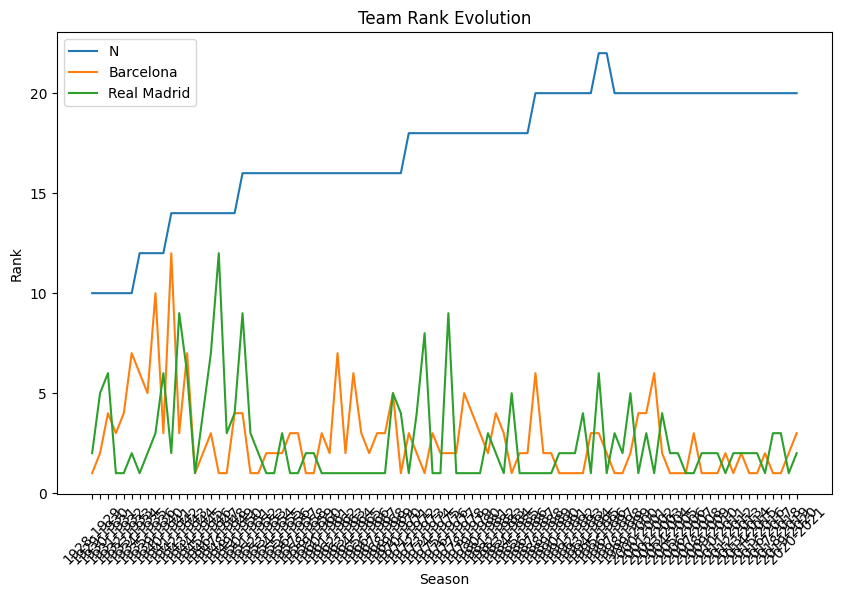

In [35]:
def New_ranks(df):
    df_filtered = process_and_filter_data(df)
    df_filtered= df_filtered[df_filtered['season'] != '2021-2022']
    df_8 = separate_wins_loses_ties(df_filtered) [['season','division','team','GF','GA','Win','Lose','Ties']]
    Results = Complete_table(df_8)
    season_division_counts = Results.groupby(['season', 'division']).size().reset_index()
    season_division_counts = season_division_counts.rename(columns={0: 'N'})
    season_division_counts['N1'] =season_division_counts['N']
    season_division_counts.loc[season_division_counts['division'] == 1, 'N1'] = 0
    merged_df = Results.merge(season_division_counts, on=['season', 'division'], how='left')
    merged_df['New_Rank'] = merged_df['rank'] + merged_df['N1']
    return(merged_df)
def plot_ranking_evolution(*teams):
    teams = [team for arg in teams for team in (arg if isinstance(arg, list) else [arg])]
    #The Plot
    merged_df= New_ranks(df)
    Results_t = merged_df[merged_df['team'].isin(teams)]
    Results_t =Results_t.sort_values(by=['season'], ascending=[True])

    plt.figure(figsize=(10, 6))
    i=1
    for team in teams:
        if (i==1):plt.plot(Results_t['season'], Results_t['N'], linestyle='-',label='N')

        i=i+1
        team_data = Results_t[Results_t['team'] == team]
        plt.plot(team_data['season'], team_data['New_Rank'], label=team)
   

    
    
    # Customize the plot
    plt.title('Team Rank Evolution')
    plt.xlabel('Season')
    plt.ylabel('Rank')
    plt.legend()
    plt.xticks(rotation=45)

plot_ranking_evolution( 'Barcelona', 'Real Madrid')
  

Arreglar lo de arriba

9. In football jargon, those teams that are permanently descending and ascending between 1st and 2nd division are called elevator teams. What are the most elevator teams in LaLiga? Plot the history of the top 5 of them using the function from exercise 9.


,team,switch_count
0,Dep. La Coruña,20.0
1,Celta de Vigo,17.0
2,Racing,17.0
3,Real Betis,14.0
4,Real Murcia,14.0
5,Rayo Vallecano,14.0
6,Real Valladolid,13.0
7,Hércules CF,13.0
8,CA Osasuna,13.0
9,RCD Mallorca,12.0


['Dep. La Coruña', 'Celta de Vigo', 'Racing', 'Real Betis', 'Real Murcia']

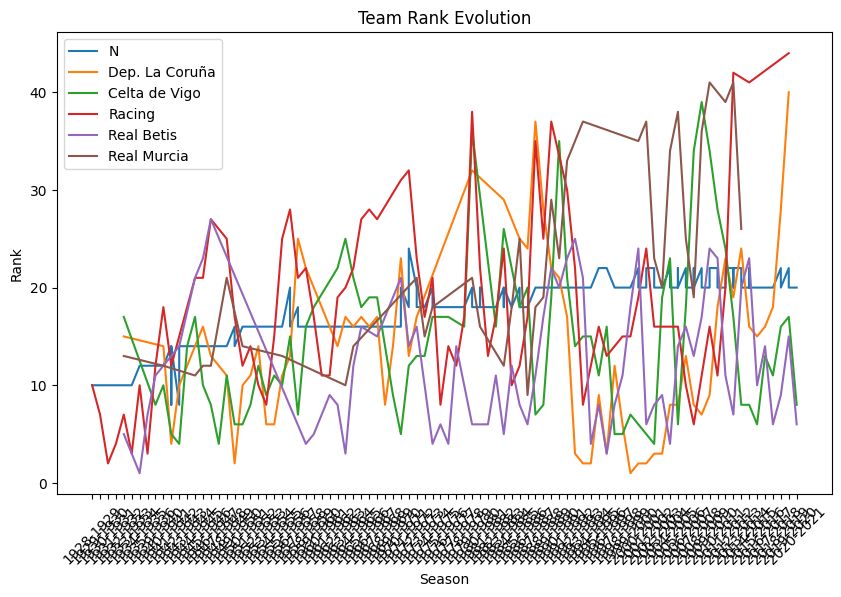

In [36]:
df_filtered = process_and_filter_data(df)
df_filtered= df_filtered[df_filtered['season'] != '2021-2022']
df_8 = separate_wins_loses_ties(df_filtered) [['season','division','team','GF','GA','Win','Lose','Ties']]
df_9 = Complete_table(df_8)

df_9.sort_values(by=['team', 'season'], inplace=True)
df_9['switch_count'] = abs(df_9['division'].diff().fillna(0))
df_9 = df_9[df_9['team'] == df_9['team'].shift()]

elevators = df_9.groupby('team')['switch_count'].sum().reset_index()
elevators = elevators.sort_values(by='switch_count', ascending=False).reset_index()
display(elevators[['team','switch_count']].head(10))
top5_elevators=elevators['team'].head(5).tolist()
display(top5_elevators)
plot_ranking_evolution(top5_elevators)

10. Create a table that is the same as the one in exercise 7, but not only with 
the season final standings, but the standings at the end of each matchday 
Columns are the same, including matchday that tells about which matchday from the season these standings are from. Would you be able to add a
new column last_5 with the result of last 5 matches? This column sho ld
contain a list like ["W", "L", "W", "T", "T"]. In this list, the first item is
the immediate previous match, the second one is the match before this one,
and so on. If there are no 5 previous matches (because matchday <  , for
instance) then just make the list s orter.
Save the final table in Excel with the name MatchdayStandings.xls  in the
reports/ folder.


%%time
df_filtered = process_and_filter_data(df)
df_filtered= df_filtered[df_filtered['season'] >= '2001-2002']
df_0 = separate_wins_loses_ties(df_filtered) [['season','division','team','GF','GA','Win','Lose','Ties','matchday']]

df_0 =df_0.sort_values(by=['season','division','matchday'], ascending=[False,True,True])

df_q['Last'] = df_q['Win']-df_q['Lose']
grouped = df_q.groupby(['season', 'division', 'team'])
df_q['GF'] = grouped['GF'].cumsum()
df_0['GA'] = grouped['GA'].cumsum()
df_0['Win'] = grouped['Win'].cumsum()
df_0['Lose'] = grouped['Lose'].cumsum()
df_0['Ties'] = grouped['Ties'].cumsum()


df_0['Pts']=3*df_0['Win']+df_0['Ties']
df_0['GD']=df_0['GF']-df_0['GA']
df_0 =df_0.sort_values(by=['season','division','matchday','Pts'], ascending=[False,True,False,False])
order=['season', 'division','team','GF','GA','GD','Win','Lose','Ties','Pts','matchday','Last']
df_0=df_0[order]
df_0 = df_0.reset_index()

df_0 = df_0.drop(columns=['index'])

def calculate_last_5(row):
    matchday = row['matchday']
    team_data = df_0[(df_0['season'] == row['season']) & (df_0['division'] == row['division']) & (df_0['team'] == row['team'])]
    last_5_matches_data = team_data[(team_data['matchday'] <= matchday) & (team_data['matchday'] > matchday - 5)]
    last_5_matches = last_5_matches_data['Last'].apply(lambda x: 'W' if x == 1 else ('L' if x == -1 else 'T')).tolist()
    return last_5_matches

df_0['last_5'] = df_0.apply(calculate_last_5, axis=1)
df_0 = df_0.drop(columns=['Last'])
print(df_0)

def all_info_match_day(df,season):
    print(season)
    df_filtered = process_and_filter_data(df)
    df_filtered = df_filtered[df_filtered['season'] == season]
    df_0 = separate_wins_loses_ties(df_filtered) [['season','division','team','GF','GA','Win','Lose','Ties','matchday']]

    df_0 =df_0.sort_values(by=['season','division','matchday'], ascending=[False,True,True])

    df_0['Last'] = df_0['Win']-df_0['Lose']
    grouped = df_0.groupby(['season', 'division', 'team'])
    df_0['GF'] = grouped['GF'].cumsum()
    df_0['GA'] = grouped['GA'].cumsum()
    df_0['Win'] = grouped['Win'].cumsum()
    df_0['Lose'] = grouped['Lose'].cumsum()
    df_0['Ties'] = grouped['Ties'].cumsum()


    df_0['Pts']=3*df_0['Win']+df_0['Ties']
    df_0['GD']=df_0['GF']-df_0['GA']
    df_0 =df_0.sort_values(by=['season','division','matchday','Pts'], ascending=[False,True,False,False])
    order=['season', 'division','team','GF','GA','GD','Win','Lose','Ties','Pts','matchday','Last']
    df_0=df_0[order]
    df_0 = df_0.reset_index()

    df_0 = df_0.drop(columns=['index'])

    def calculate_last_5(row):
        matchday = row['matchday']
        team_data = df_0[(df_0['season'] == row['season']) & (df_0['division'] == row['division']) & (df_0['team'] == row['team'])]
        last_5_matches_data = team_data[(team_data['matchday'] <= matchday) & (team_data['matchday'] >= matchday - 4)]
        last_5_matches = last_5_matches_data['Last'].apply(lambda x: 'W' if x == 1 else ('L' if x == -1 else 'T')).tolist()
        return last_5_matches

    df_0['last_5'] = df_0.apply(calculate_last_5, axis=1)
    df_0 = df_0.drop(columns=['Last'])
    return df_0

all_seasons = df['season'].unique().tolist()[::-1]

df_final_10 = all_info_match_day(df , all_seasons[0])
for season in all_seasons[1:5]:
    new_def = all_info_match_day(df,season)
    df_final_10 = pd.concat([df_final_10, new_def], ignore_index=True)
print("Finished!")
print(df_final_10.head(10))

In [37]:
df_filtered = process_and_filter_data(df)
df_0 = separate_wins_loses_ties(df_filtered) [['season','division','team','GF','GA','Win','Lose','Ties','matchday']]
df_0 =df_0.sort_values(by=['season','division','matchday'], ascending=[False,True,True])

df_0['Last'] = df_0['Win']-df_0['Lose']
grouped = df_0.groupby(['season', 'division', 'team'])
df_0['GF'] = grouped['GF'].cumsum()
df_0['GA'] = grouped['GA'].cumsum()
df_0['Win'] = grouped['Win'].cumsum()
df_0['Lose'] = grouped['Lose'].cumsum()
df_0['Ties'] = grouped['Ties'].cumsum()


df_0['Pts']=3*df_0['Win']+df_0['Ties']
df_0['GD']=df_0['GF']-df_0['GA']
df_0 =df_0.sort_values(by=['season','division','matchday','Pts'], ascending=[False,True,False,False])
order=['season', 'division','team','GF','GA','GD','Win','Lose','Ties','Pts','matchday','Last']
df_0=df_0[order]
df_0 = df_0.reset_index()

df_0 = df_0.drop(columns=['index'])

df_0['Last']=df_0['Last'].apply(lambda x: 'W' if x == 1 else ('L' if x == -1 else 'T'))
for i in range(5):
    df_0[f"last_{i}"] = df_0.groupby(['division','season' ,'team'])['Last'].shift(-i)


df_0["last_5"] = df_0[[f"last_{i}" for i in range(5)]].agg(lambda x: [i for i in x if not pd.isna(i)],axis=1)

df_0 = df_0.drop(columns=['Last'])
for i in range(5):
    df_0 = df_0.drop(columns=[f"last_{i}"])

display(df_0)

,season,division,team,GF,GA,GD,Win,Lose,Ties,Pts,matchday,last_5
0,2021-2022,1,RCD Mallorca,3,1,2,2,0,1,7,3,"[W, W, T]"
1,2021-2022,1,Valencia,5,1,4,2,0,1,7,3,"[W, T, W]"
2,2021-2022,1,Barcelona,7,4,3,2,0,1,7,3,"[W, T, W]"
3,2021-2022,1,Atlético Madrid,5,3,2,2,0,1,7,3,"[T, W, W]"
4,2021-2022,1,Sevilla FC,5,1,4,2,0,1,7,3,"[T, W, W]"
...,...,...,...,...,...,...,...,...,...,...,...,...
95995,1928-1929,1,Athletic,1,1,0,0,0,1,1,1,[T]
95996,1928-1929,1,Arenas Club,2,3,-1,0,1,0,0,1,[L]
95997,1928-1929,1,Racing,0,2,-2,0,1,0,0,1,[L]
95998,1928-1929,1,Real Unión,2,3,-1,0,1,0,0,1,[L]


In [38]:
df_filtered = process_and_filter_data(df)

df_filtered= df_filtered[df_filtered['season'] != '2021-2022']

df_0 = separate_wins_loses_ties(df_filtered) [['season','division','team','GF','GA','Win','Lose','Ties','matchday']]
df_0 =df_0.sort_values(by=['season','division','matchday'], ascending=[False,True,True])

df_0['Last'] = df_0['Win']-df_0['Lose']
grouped = df_0.groupby(['season', 'division', 'team'])
df_0['GF'] = grouped['GF'].cumsum()
df_0['GA'] = grouped['GA'].cumsum()
df_0['Win'] = grouped['Win'].cumsum()
df_0['Lose'] = grouped['Lose'].cumsum()
df_0['Ties'] = grouped['Ties'].cumsum()


df_0['Pts']=3*df_0['Win']+df_0['Ties']
df_0['GD']=df_0['GF']-df_0['GA']
df_0 =df_0.sort_values(by=['season','division','matchday','Pts'], ascending=[False,True,False,False])
order=['season', 'division','team','GF','GA','GD','Win','Lose','Ties','Pts','matchday','Last']
df_0=df_0[order]
df_0 = df_0.reset_index()

df_0 = df_0.drop(columns=['index'])


for i in range(5):
   df_0[f"last_{i}"] = df_0.groupby(['division','season' ,'team'])['Last'].shift(-i)




df_0["last_5"] = df_0[[f"last_{i}" for i in range(5)]].agg(lambda x: [i for i in x if not pd.isna(i)],axis=1)

df_0 = df_0.drop(columns=['Last'])
for i in range(5):
    df_0 = df_0.drop(columns=[f"last_{i}"])

df_0['Sum'] = df_0['last_5'].apply(sum)

df_0['GD_2']= df_0.groupby(['division','season' ,'team'])['GD'].shift(-1)
df_0['Pts2']= df_0.groupby(['division','season' ,'team'])['Pts'].shift(-1)
df_0['Sum_2']= df_0.groupby(['division','season' ,'team'])['Sum'].shift(-1)
df_0['N'] = df_0['matchday'].apply(lambda x: 1 if x == 0 else 1)
df_0['GD_2'] = df_0['N'] * df_0['GD_2']
df_0['Pts2'] = df_0['N'] * df_0['Pts2']
df_0['Sum_2'] = df_0['N'] * df_0['Sum_2']
df_0.fillna(0, inplace=True)


display(df_0)


,season,division,team,GF,GA,GD,Win,Lose,Ties,Pts,matchday,last_5,Sum,GD_2,Pts2,Sum_2,N
0,2020-2021,1,Atlético Madrid,67,25,42,26,4,8,86,38,"[1.0, 1.0, 1.0, 0.0, 1.0]",4.0,41.0,83.0,4.0,1
1,2020-2021,1,Real Madrid,67,28,39,25,4,9,84,38,"[1.0, 1.0, 1.0, 0.0, 1.0]",4.0,38.0,81.0,3.0,1
2,2020-2021,1,Barcelona,85,38,47,24,7,7,79,38,"[1.0, -1.0, 0.0, 0.0, 1.0]",1.0,46.0,76.0,-1.0,1
3,2020-2021,1,Sevilla FC,53,33,20,24,9,5,77,38,"[1.0, -1.0, 1.0, 0.0, -1.0]",0.0,19.0,74.0,0.0,1
4,2020-2021,1,Real Sociedad,59,38,21,17,10,11,62,38,"[1.0, 1.0, -1.0, 1.0, -1.0]",1.0,20.0,59.0,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95871,1928-1929,1,Athletic,1,1,0,0,0,1,1,1,[0.0],0.0,0.0,0.0,0.0,1
95872,1928-1929,1,Arenas Club,2,3,-1,0,1,0,0,1,[-1.0],-1.0,0.0,0.0,0.0,1
95873,1928-1929,1,Racing,0,2,-2,0,1,0,0,1,[-1.0],-1.0,0.0,0.0,0.0,1
95874,1928-1929,1,Real Unión,2,3,-1,0,1,0,0,1,[-1.0],-1.0,0.0,0.0,0.0,1
